In [2]:
### # Linear Regression - Housing Price Prediction

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#Load Dataset
data = pd.read_csv('/content/Housing.csv')

In [5]:
#Explore Dataset
print("First 5 Rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nDataset Description:\n")
print(data.describe())
print("\nMissing Values:\n", data.isnull().sum())

First 5 Rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 

In [6]:
#Preprocessing
# Encode categorical variables if any
if data.select_dtypes(include=['object']).shape[1] > 0:
    data = pd.get_dummies(data, drop_first=True)


In [7]:
#Define Features and Target
X = data.drop('price', axis=1)
y = data['price']


In [8]:
#Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#Model Parameters
print("\nModel Intercept:", model.intercept_)
print("Model Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Model Intercept: 260032.35760741215
Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [11]:
#Predict on Test Data
y_pred = model.predict(X_test)

In [12]:
#Evaluate the Model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

In [13]:
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Evaluation Metrics:
Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
Root Mean Squared Error (RMSE): 1324506.9600914386
R^2 Score: 0.6529242642153184


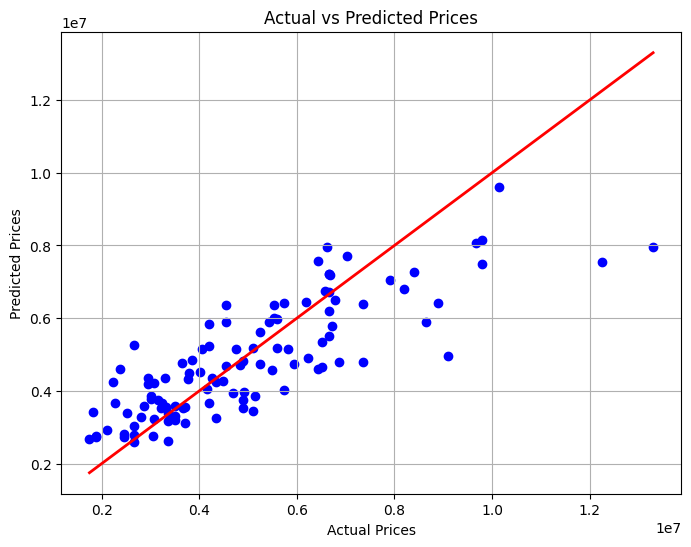

In [15]:
#Visualization
# Scatter plot for Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

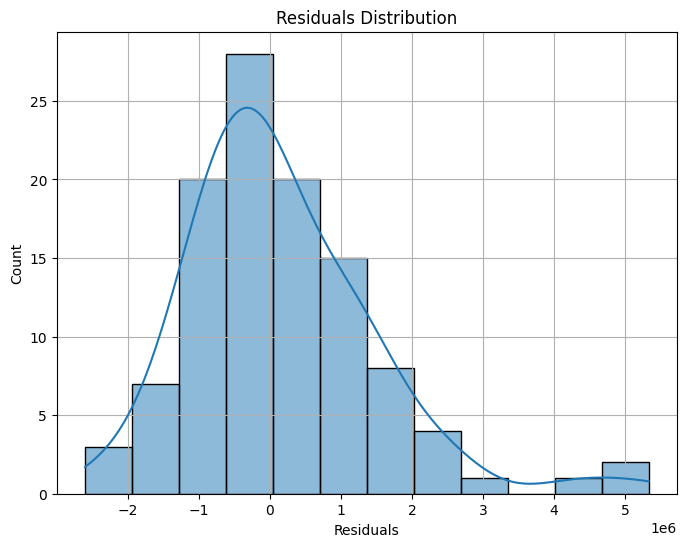

In [16]:
#Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

In [17]:
#Conclusion
print("\nConclusion:")
print(f"The model explains {r2*100:.2f}% of the variance in the housing prices.")
print("Evaluate further by checking assumptions and tuning if needed.")


Conclusion:
The model explains 65.29% of the variance in the housing prices.
Evaluate further by checking assumptions and tuning if needed.
